In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,NaN,-6.107600,NaN,1.33770,NaN,1.68610,1.09510,NaN,0.12790,NaN,NaN,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
float64		column 2	31
float64		column 3	24
float64		column 4	36
float64		column 5	24
float64		column 6	24
float64		column 7	43
float64		column 8	37
float64		column 9	37
float64		column 10	66
float64		column 11	43
float64		column 12	54


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,381.000000,369.000000,376.000000,364.000000,376.000000,376.000000,357.000000,363.000000,363.000000,334.000000,357.000000,346.000000
mean,-0.129430,0.022214,2.022459,1.903568,1.927479,1.955894,1.999113,1.961299,1.964968,2.023893,1.953993,1.936237
std,2.603442,2.772635,1.131427,1.158758,1.168823,1.143460,1.175614,1.143787,1.163616,1.161887,1.166289,1.193592
min,-7.771000,-6.800500,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.737350,-0.838750,1.119050,0.936392,0.879012,0.980942,0.971740,1.000225,0.948385,1.040900,0.881100,0.893482
50%,-0.072087,-0.004739,2.068550,1.770600,1.906950,1.967350,2.061700,1.951100,2.118600,2.056000,1.876200,1.899100
75%,0.729830,0.869050,2.971875,2.902000,2.991100,2.937800,2.992700,2.953600,2.945800,3.076475,2.967000,2.954950
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.981000


<AxesSubplot:>

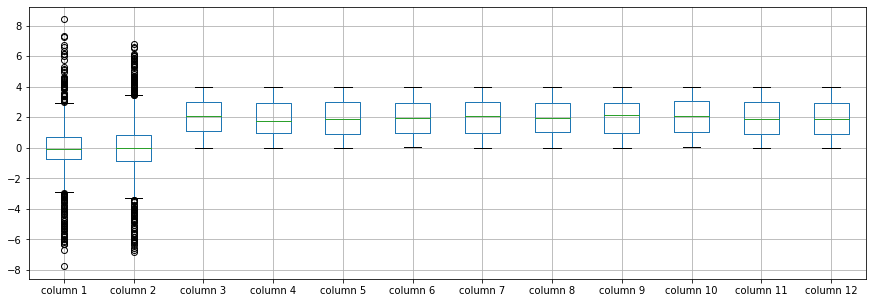

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.129430
column 2     0.022214
column 3     2.022459
column 4     1.903568
column 5     1.927479
column 6     1.955894
column 7     1.999113
column 8     1.961299
column 9     1.964968
column 10    2.023893
column 11    1.953993
column 12    1.936237
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.008122,-0.038986,-0.049947,0.003549,0.000308,-0.007538,0.067381,-0.038358,0.069807,0.061085,-0.025819
column 2,0.008122,1.000000,-0.046360,0.038352,-0.100955,-0.085854,0.011906,-0.054648,-0.019317,-0.010752,-0.015184,0.074872
column 3,-0.038986,-0.046360,1.000000,-0.010831,-0.013551,-0.056775,-0.079769,0.059840,0.128757,-0.018630,-0.086941,0.035004
column 4,-0.049947,0.038352,-0.010831,1.000000,0.011231,0.094705,0.026665,0.084777,-0.024266,0.090718,-0.034716,-0.035949
column 5,0.003549,-0.100955,-0.013551,0.011231,1.000000,0.090698,0.057257,-0.022525,-0.038641,0.049366,0.016600,-0.074598
column 6,0.000308,-0.085854,-0.056775,0.094705,0.090698,1.000000,-0.001482,0.029638,0.019964,0.024130,0.002772,-0.073691
column 7,-0.007538,0.011906,-0.079769,0.026665,0.057257,-0.001482,1.000000,-0.004821,0.092714,0.019587,0.004585,-0.073611
column 8,0.067381,-0.054648,0.059840,0.084777,-0.022525,0.029638,-0.004821,1.000000,0.087388,-0.161208,-0.050103,-0.020595
column 9,-0.038358,-0.019317,0.128757,-0.024266,-0.038641,0.019964,0.092714,0.087388,1.000000,-0.038847,0.041251,0.031115
column 10,0.069807,-0.010752,-0.018630,0.090718,0.049366,0.024130,0.019587,-0.161208,-0.038847,1.000000,0.055411,0.032698


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+13,12+13+13,12+13+13+13,12+13+13+13+13,12+13+13+13+13+13,12+13+13+13+13+13+13,12+13+13+13+13+13,12+13+13+13+13,12+13+13+13,12+13+13,12+13,12], vae_layer = False, seed = 13)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.336990585327147
Epoch: 1 , loss: 25.289421768188475
Epoch: 2 , loss: 25.21103385925293
Epoch: 3 , loss: 25.23474266052246
Epoch: 4 , loss: 25.161198348999022
Epoch: 5 , loss: 25.074410095214844
Epoch: 6 , loss: 25.075239639282227
Epoch: 7 , loss: 25.0262149810791
Epoch: 8 , loss: 24.890113372802734
Epoch: 9 , loss: 24.67319221496582
Epoch: 10 , loss: 24.21356384277344
Epoch: 11 , loss: 22.820615310668945
Epoch: 12 , loss: 20.85933647155762
Epoch: 13 , loss: 19.605971908569337
Epoch: 14 , loss: 19.68192329406738
Epoch: 15 , loss: 19.048078842163086
Epoch: 16 , loss: 18.809126014709474
Epoch: 17 , loss: 18.844598236083986
Epoch: 18 , loss: 18.637455139160156
Epoch: 19 , loss: 18.586603698730467
Epoch: 20 , loss: 18.718491516113282
Epoch: 21 , loss: 18.507024269104004
Epoch: 22 , loss: 18.71646026611328
Epoch: 23 , loss: 18.554977951049803
Epoch: 24 , loss: 18.449942321777343
Epoch: 25 , loss: 18.25039

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
396,-0.310082,0.0,-3.164933,0.000000,-0.672862,0.000000,0.00000,-3.035068,0.0,0.198749,-2.620246,0.000000
397,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
398,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(40.0411352990173, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.24523818590156707

In [18]:
new_df.iloc[66,:]

column 1    -0.038864
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     0.526159
column 8     3.074200
column 9     0.529823
column 10    0.523577
column 11    0.531856
column 12    0.516882
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.886600,2.469600,0.21541,3.090000,0.78343,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.434300,3.129900,1.277800,1.42850,0.143330,1.19480,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.768200,1.210000,3.99630,2.217300,3.90290,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.332780,0.190270,0.567160,1.66010,2.352700,0.66126,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.561600,3.201400,3.377400,1.52260,0.984750,3.10940,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.882690,0.354060,1.62780,3.294000,1.08500,0.157400,0.465040,2.851400
396,-0.045452,-6.107600,0.740467,1.337700,0.745838,1.686100,1.09510,0.758532,0.12790,0.741239,0.745554,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.550900,1.470100,0.92540,1.841100,3.47730,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.396550,2.999000,3.410100,2.95160,0.278000,0.99059,3.437400,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AE_10(imp).xlsx", index=False, header=False)